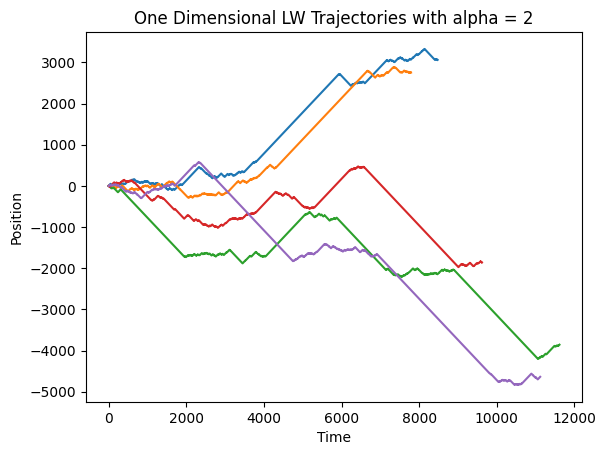

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


alpha = 2
v = 1
def generate_1D_trajectory():
    t = 0
    r = np.random.uniform(0, 1, size=1000)
    delta_t = r ** (-1 / (3 - alpha))
    w = np.random.choice([-1, 1], size=1000)
    x = np.zeros(1000)
    all_t = [t]
    for i in range(len(delta_t) - 1):
        x[i + 1] = x[i] + w[i] * v * delta_t[i]
        t += delta_t[i]
        all_t.append(t)
    return x, all_t


for _ in range(5):
    x, t = generate_1D_trajectory()
    plt.plot(t, x)

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('One Dimensional LW Trajectories with alpha = 2')
plt.savefig('One_Dimensional_LW_Trajectories.png')
plt.show()


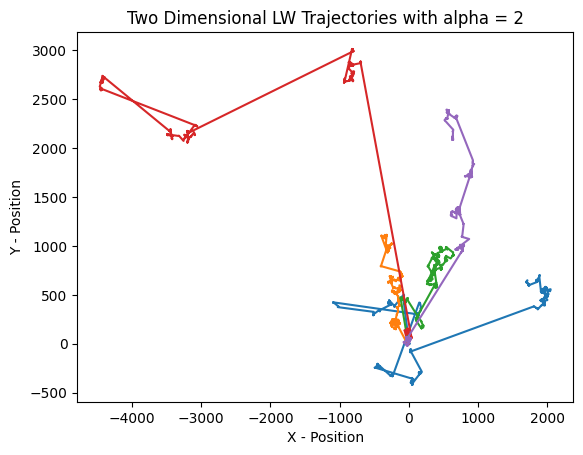

In [20]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 2
v = 1


def generate_2D_trajectory():
    r = np.random.uniform(0, 1, size=1000)
    delta_t = r ** (-1 / (3 - alpha))

    w = np.random.uniform(-np.pi, np.pi, size=1000)
    phi = np.zeros(1000)
    x = np.zeros(1000)
    y = np.zeros(1000)
    all_t = [0]
    for i in range(len(delta_t) - 1):
        phi[i + 1] = phi[i] + w[i]
        x[i + 1] = x[i] + v * np.cos(phi[i]) * delta_t[i]
        y[i + 1] = y[i] + v * np.sin(phi[i]) * delta_t[i]
        all_t.append(all_t[-1] + delta_t[i])
    return x, y, all_t


for _ in range(5):
    x, y, t = generate_2D_trajectory()
    plt.plot(x, y)

plt.xlabel('X - Position')
plt.ylabel('Y - Position')
plt.title('Two Dimensional LW Trajectories with alpha = 2')
plt.savefig('Two_Dimensional_LW_Trajectories.png')
plt.show()

## P3

plot the eMSD and tMSD for a 1-dimensional LW with α = 2.

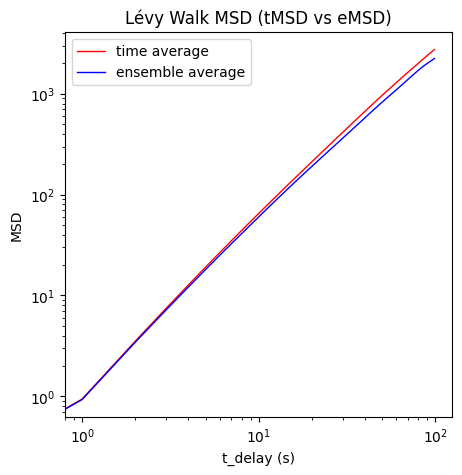

In [251]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 1D Lévy Walk 轨迹
def generate_1D_trajectory(N_steps, alpha=2, v=1):
    """
    Generate a 1D Lévy walk trajectory.
    
    Parameters
    ==========
    N_steps : Number of steps in the trajectory.
    alpha : Lévy index controlling the step distribution.
    v : Velocity of the walker.
    
    Returns
    =======
    x : Position of the walker at each step.
    all_t : Non-uniform time array.
    """
    t = 0
    r = np.random.uniform(0, 1, size=N_steps)  # Uniform random numbers
    delta_t = np.clip(r ** (-1 / (3 - alpha)), 1e-2, 1e2)  # Time intervals
    w = np.random.choice([-1, 1], size=N_steps)  # Random directions
    x = np.zeros(N_steps)  # Trajectory positions
    all_t = [t]  # Accumulated time array
    for i in range(len(delta_t) - 1):
        x[i + 1] = x[i] + w[i] * v * delta_t[i]
        t += delta_t[i]
        all_t.append(t)
    return x, np.array(all_t)

def regularize(x_nu, t_nu, t):
    """
    Regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    
    Returns
    =======
    x : Regularized trajectory.
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.
    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        s_end = np.where(t < t_nu[i + 1])[0][-1]                 
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1] - t_nu[i]) 
        s = s_end + 1                                           
    return x


def tMSD_1d(x, N_steps):
    """
    Compute the time-averaged mean squared displacement (tMSD).
    
    Parameters
    ==========
    x : Regularized trajectory.
    N_steps : Number of time steps.
    
    Returns
    =======
    tMSD : Time-averaged MSD.
    """
    tMSD = np.zeros(N_steps)
    for t in range(N_steps):
        displacements = x[t:] - x[:N_steps - t]
        tMSD[t] = np.mean(displacements**2)
    return tMSD


def eMSD_1d(x):
    """
    Compute the ensemble-averaged mean squared displacement (eMSD).
    
    Parameters
    ==========
    x : Ensemble of trajectories.
    
    Returns
    =======
    eMSD : Ensemble-averaged MSD.
    """
    N_traj, N_steps = x.shape
    eMSD = np.zeros(N_steps)
    for t in range(N_steps):
        displacements = x[:, t:] - x[:, :N_steps - t]
        eMSD[t] = np.mean(displacements**2)
    return eMSD


alpha = 2  # Lévy index
v = 1  # Velocity of the walker

# Part I : tMSD
t_tot = 10000  # Total duration
N_steps = 10000  # Number of steps in trajectory
dt = 1  # Regularized time step

# Uniform sampling for time-averaging
t_t = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_t = np.size(t_t)

# Generate a single Lévy Walk trajectory
x, t_nu = generate_1D_trajectory(N_steps, alpha=alpha, v=v)
x_t = regularize(x, t_nu, t_t)  # Regularize trajectory to uniform time grid

# Calculate tMSD
tmsd = tMSD_1d(x_t, N_steps_t)

# Part II: eMSD
t_tot = 100  # Total duration for each trajectory
N_steps = 1000  # Number of steps in trajectory
dt = 1  # Regularized time step

# Uniform sampling for ensemble-averaging
t_e = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_e = np.size(t_e) # infact = t_tot / dt
N_traj = 100  # Number of trajectories 

# Generate trajectories
x_e = np.zeros([N_traj, N_steps_e])
for i in range(N_traj):
    x, t_nu = generate_1D_trajectory(N_steps, alpha=alpha, v=v)
    x_r = regularize(x, t_nu, t_e)  # Regularize trajectory
    x_e[i, :] = x_r

# Calculate eMSD
emsd = eMSD_1d(x_e)


plt.figure(figsize=(5, 5))
plt.loglog(t_e, tmsd[:len(t_e)], '-', color='r', linewidth=1, label='time average')
plt.loglog(t_e, emsd, '-', color='b', linewidth= 1, label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.title('Lévy Walk MSD (tMSD vs eMSD)')
plt.savefig('tMSD_vs_eMSD.png')
plt.show()
